In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from mpl_toolkits import mplot3d

In [2]:
#multiple X
Md=pd.read_csv('C:\\Users\\Ghost\\Desktop\\AIML\\c2c-ai\\CW-1\\Salary_multiple.csv')

In [3]:
print(Md.head())

   YearsExperience          Field   Salary
0              1.1      Technical  39343.0
1              1.3  Non-Technical  26205.0
2              1.5      Technical  37731.0
3              2.0  Non-Technical  28525.0
4              2.2      Technical  39891.0


In [4]:
#preprocessing
Md.loc[:,'Field'].replace(['Technical','Non-Technical'],[0,1],inplace=True)
print(Md.describe)

<bound method NDFrame.describe of     YearsExperience  Field    Salary
0               1.1      0   39343.0
1               1.3      1   26205.0
2               1.5      0   37731.0
3               2.0      1   28525.0
4               2.2      0   39891.0
5               2.9      1   36642.0
6               3.0      0   60150.0
7               3.2      1   34445.0
8               3.2      0   64445.0
9               3.7      0   57189.0
10              3.9      1   43218.0
11              4.0      0   55794.0
12              4.0      0   56957.0
13              4.1      0   57081.0
14              4.5      1   41111.0
15              4.9      1   47938.0
16              5.1      1   56029.0
17              5.3      0   83088.0
18              5.9      0   81363.0
19              6.0      1   53940.0
20              6.8      1   61738.0
21              7.1      0   98273.0
22              7.9      0  101302.0
23              8.2      1   73812.0
24              8.7      0  109431.0
25  

In [5]:
#split x and y
x=Md.iloc[:,:-1].values
print(x)
y=Md.iloc[:,2].values
print(y)

[[ 1.1  0. ]
 [ 1.3  1. ]
 [ 1.5  0. ]
 [ 2.   1. ]
 [ 2.2  0. ]
 [ 2.9  1. ]
 [ 3.   0. ]
 [ 3.2  1. ]
 [ 3.2  0. ]
 [ 3.7  0. ]
 [ 3.9  1. ]
 [ 4.   0. ]
 [ 4.   0. ]
 [ 4.1  0. ]
 [ 4.5  1. ]
 [ 4.9  1. ]
 [ 5.1  1. ]
 [ 5.3  0. ]
 [ 5.9  0. ]
 [ 6.   1. ]
 [ 6.8  1. ]
 [ 7.1  0. ]
 [ 7.9  0. ]
 [ 8.2  1. ]
 [ 8.7  0. ]
 [ 9.   1. ]
 [ 9.5  1. ]
 [ 9.6  0. ]
 [10.3  1. ]
 [10.5  0. ]]
[ 39343.  26205.  37731.  28525.  39891.  36642.  60150.  34445.  64445.
  57189.  43218.  55794.  56957.  57081.  41111.  47938.  56029.  83088.
  81363.  53940.  61738.  98273. 101302.  73812. 109431.  75582.  76969.
 112635.  82391. 121872.]


In [6]:
#spliting dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [7]:
#now model training fitting
MultRegresser=LinearRegression()
model=MultRegresser.fit(x_train,y_train)
print(x_train.shape)
print(y_train.shape)

(24, 2)
(24,)


In [8]:
print(model.coef_)
print(model.intercept_)

[  8294.78879301 -25022.55343859]
30576.751810795453


In [9]:
#now predicting values
custom_value=np.array([[13, 0],[300, 1]])
print(model.predict(custom_value))

[ 138409.00611996 2493990.8362761 ]


In [10]:
#for plotting 
Years=[row[0] for row in x_train]
TechOrNot=[row[1] for row in x_train]
#Years=Years.reshape(-1,1)
print(Years)

[10.3, 10.5, 3.9, 9.6, 5.1, 4.0, 9.5, 3.2, 9.0, 4.1, 8.7, 5.9, 5.3, 2.0, 7.9, 3.2, 6.8, 3.7, 4.0, 2.2, 1.1, 3.0, 1.5, 6.0]


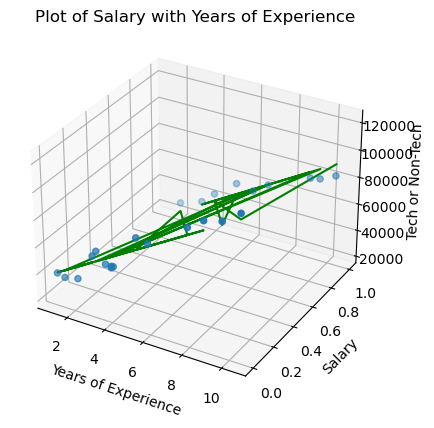

In [11]:
#plotting
ax = plt.axes(projection='3d')
plt.title("Plot of Salary with Years of Experience")
ax.set_xlabel('Years of Experience')
ax.set_ylabel('Salary')
ax.set_zlabel('Tech or Non-Tech')
ax.scatter(Years,TechOrNot,y_train)
ax.plot3D(Years,TechOrNot,MultRegresser.predict(x_train),c='g')